# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [242]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Enable graphical display
%matplotlib inline

In [243]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [244]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [245]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT ADSP/project/Food Hub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [246]:
# Assess the dimensions (number of rows and columns) of DataFrame.
print("The Shape of the Dataset",df.shape)

The Shape of the Dataset (1898, 9)


#### Observations:
There are total 1898 rows(observations) and 9 columns(features) in the dataset.


In [247]:
#Use info() to print a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Three different types of data have been observed
  1. int64
  2. float64
  3. object

*   4 columns are int64 type: order_id, customer_id, food_preparation_time and delivery_time
*   1 column is float64 type: cost_of_the_order
*   4 columns are object type: restaurant_name, cuisine_type, day_of_the_week and rating

In [248]:
#check null values
null_values = df.isnull().sum()  #isnull() function check missing valus and sum() count total null field
print(null_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There is no missing values in this dataset. So, no treatment is required. If there was any, it is important to handle null values with appropiate way.


### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [249]:
# To show the summary of features
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [250]:
# Use of pandas statistical function to get the summary of data
print("Minimum time for food to be prepared: ",df.food_preparation_time.min())
print("Maximum time for food to be prepared: ",df.food_preparation_time.max())
print("Average time for food to be prepared: ",round(df.food_preparation_time.mean(),2))


Minimum time for food to be prepared:  20
Maximum time for food to be prepared:  35
Average time for food to be prepared:  27.37


#### Observations:
From the observations minimum time to prepare food is 20 minutes, maximum time is 35 minutes and average time is 27.37 minutes


In [251]:
# Count the values of specific column
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There are 736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

**Order ID**

In [252]:
# check unique order ID
df['order_id'].nunique()

1898

####Observation:
There are total 1898 orders have been placed. All order ID are unique.


**Customer ID**

In [253]:
# check the number of unique customer ID
df['customer_id'].nunique()

1200

In [254]:
# plotting Customer_id using countplot
plt.figure(figsize=(200,80)) #Set the figure size
sns.countplot(data=df, x='customer_id')
plt.show()

In [255]:
pd.DataFrame(df['customer_id'].value_counts()).value_counts()

customer_id
1              784
2              267
3               83
4               33
5               19
6                6
7                4
8                1
9                1
10               1
13               1
dtype: int64

#### Observations:
* There are total 1200 unique customer ID.
* Total 784 customers placed only 1 order.

**Restaurant name**

In [256]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

**Cuisine type**

In [257]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

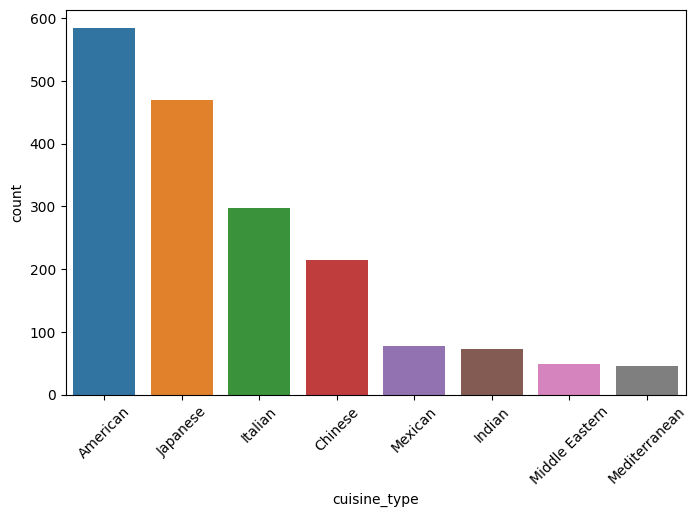

In [258]:
# plotting cuisine type using countplot
plt.figure(figsize = (8,5)) #set the figure size
sns.countplot(data = df, x = 'cuisine_type',order=df.cuisine_type.value_counts().iloc[:8].index)
plt.xticks(rotation=45)
plt.show()

####Observations
There are 12 unique cuisine type.
Among them American Cuisine is most popular. Near to 600 orders have been placed. Other top cuisins are Japanese, Italian and Chinese. So far Mexican, Indian, Middle Eastern, Mediterian cuisine's orders placed below 100.

**Cost_of_the_order**

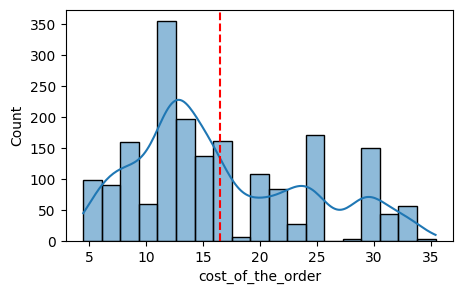

In [259]:
# plotting cost of order using histogram
plt.figure(figsize = (5,3)) #set the figure size
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.axvline(df['cost_of_the_order'].mean(),color='r',linestyle='--') #mean value of the column indicated with doted line symbol
plt.show()


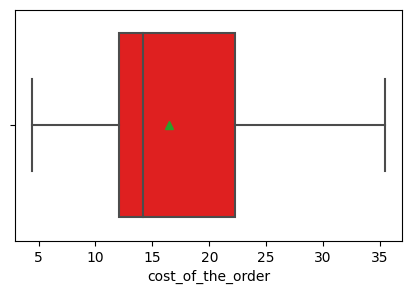

In [260]:
# plotting cost of order using boxplot
plt.figure(figsize = (5,3)) #set the figure size
sns.boxplot(data=df,x='cost_of_the_order', showmeans=True, color='red')
plt.show()

#### Observation:
* The histplot is skewed to the right. however, there is a slight peak at around 25 and 30 dollars. Average cost of order is around 16 dollars.
* The boxplot indicates that the median cost is about 14 dollars and mean is around 16 dollars.

**Day of the week**

In [261]:
# Check the unique values
df['day_of_the_week'].nunique()

2

In [262]:
print('Weekends are', (round(df['day_of_the_week'].value_counts()[0])),'i.e.', round(df['day_of_the_week'].value_counts()[0]/len(df) * 100,2), '% of the day')
print('Weekdays are', (round(df['day_of_the_week'].value_counts()[1])),'i.e.',round(df['day_of_the_week'].value_counts()[1]/len(df) * 100,2), '% of the day')

Weekends are 1351 i.e. 71.18 % of the day
Weekdays are 547 i.e. 28.82 % of the day


<Axes: xlabel='day_of_the_week', ylabel='count'>

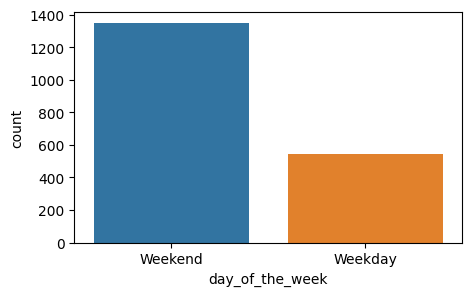

In [263]:
# plotting day of the week using countplot
plt.figure(figsize = (5,3)) #set the figure size
sns.countplot(data = df, x = 'day_of_the_week')

####Observations:
* Weekends orders are 1351 i.e. 71.18 % of the day
* Weekdays orders are 547 i.e. 28.82 % of the day

Most of the orders are placed on weekends.

**Rating**

In [264]:
# Check the unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

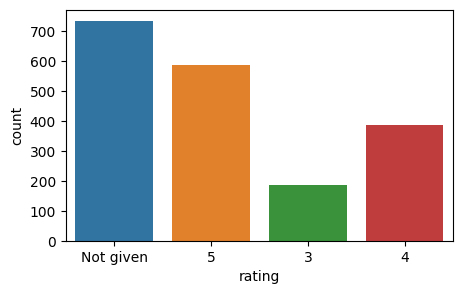

In [265]:
# plotting the order rating using countplot
plt.figure(figsize = (5,3)) #set the figure size
sns.countplot(data = df, x = 'rating')

In [266]:
print(df['rating'].value_counts())
print(round(100*df['rating'].value_counts()/len(df),2))


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
Not given    38.78
5            30.98
4            20.34
3             9.91
Name: rating, dtype: float64


####Observations:
The majority of customers (38.78%) didn't provide any rating. 588 Customers provide rating 5. 4 and 3 rating given by 386 and 188 customers respectively.

**Food Preparation time**

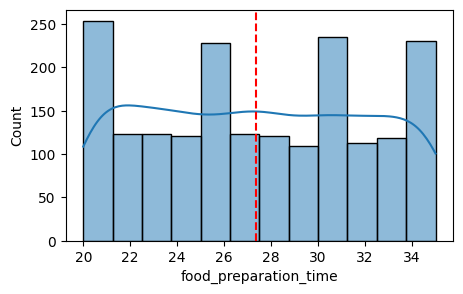

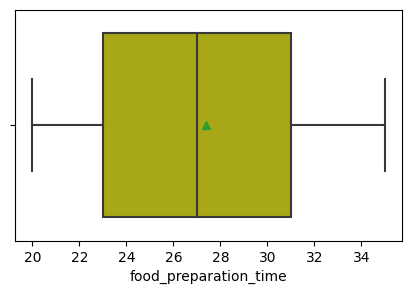

In [267]:
# plotting the time of food preparation using histogram
plt.figure(figsize = (5,3)) #set the figure size
sns.histplot(data=df, x='food_preparation_time', kde=True) #To identify pattern kde(Kernel Density Estimation) is assigned True
plt.axvline(df['food_preparation_time'].mean(),color='r',linestyle='--') #mean value of the column indicated with doted line symbol
plt.show()
plt.figure(figsize = (5,3)) #set the figure size
# plotting food_preparation_time using boxplot
sns.boxplot(data=df,x='food_preparation_time', showmeans=True, color='y') #mean value is showing with a symbol
plt.show()

#### Observation:
* There is a fairly even distribution of the time it takes to prepare the cuisine between 20 minutes and 36 minutes with average food preparation time around 27 minutes.
* The boxplot indicates that the median and mean food preparation time is close around 27 minutes.


**Food Delivery Time**

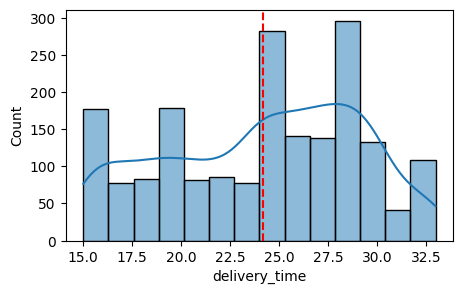

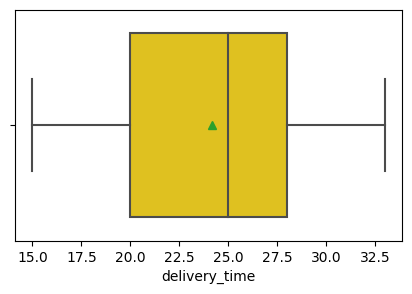

In [268]:
# plotting the time of food preparation using histogram
plt.figure(figsize = (5,3)) #set the figure size
sns.histplot(data=df, x='delivery_time', kde=True) #To identify pattern kde(Kernel Density Estimation) is assigned True
plt.axvline(df['delivery_time'].mean(),color='r',linestyle='--') #mean value of the column indicated with doted line symbol
plt.show()
plt.figure(figsize = (5,3)) #set the figure size
# plotting food_preparation_time using boxplot
sns.boxplot(data=df,x='delivery_time', showmeans=True, color='gold') #mean value is showing with a symbol
plt.show()

#### Observations:
* Slightly left skewed.
* From the histplot observation, the average delivery time is around 24 minutes.
* From the boxplot it is determine that most of the orders taken delivered between 20 and 28 minutes.

In [269]:
# Count the specific column data with values and by default return first five observations with head function
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack is the most popular restaurant get 219 orders. Other four restaurants The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm have received 132, 119, 96, 68 orders respectively.


### Which is the most popular cuisine on weekends?

In [270]:
# Count the values of cuisine type by filtering weekend days
df[df['day_of_the_week']=="Weekend"].groupby('day_of_the_week')['cuisine_type'].value_counts()


day_of_the_week  cuisine_type  
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American cuisine placed total 415 orders on weekends so it is most popular.


### What percentage of the orders cost more than 20 dollars?

In [271]:
from pandas._libs.tslibs import normalize_i8_timestamps
# Calculate the total number of orders
TO=df['cost_of_the_order'].count()
# Calculate the number of orders cost more than 20 dollars
cost20=df['cost_of_the_order'][df['cost_of_the_order']>20].count()
#calculate the percentage
print("The orders cost more than 20 dollars is {0} percent".format(round((100*cost20/TO),2)))

The orders cost more than 20 dollars is 29.24 percent


#### Observations:
29.24 percent of the orders cost more than 20 dollars


### What is the mean order delivery time?

In [272]:
# Count the average order delivery time using pandas mean() function
print("Average order delivery time {0} minutes ".format(round(df['delivery_time'].mean(),2)))

Average order delivery time 24.16 minutes 


#### Observations:
Mean order delivery time is 24.16 minutes


### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [273]:
# Count the number of orders the top 3 customers have been placed
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Top 3 customers with number of orders are:
        
*  ID 52832 placed 13 orders
*  ID 47440 placed 10 orders
*  ID 83287 placed 9 orders


### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


**Restaurant vs Cost of the order**

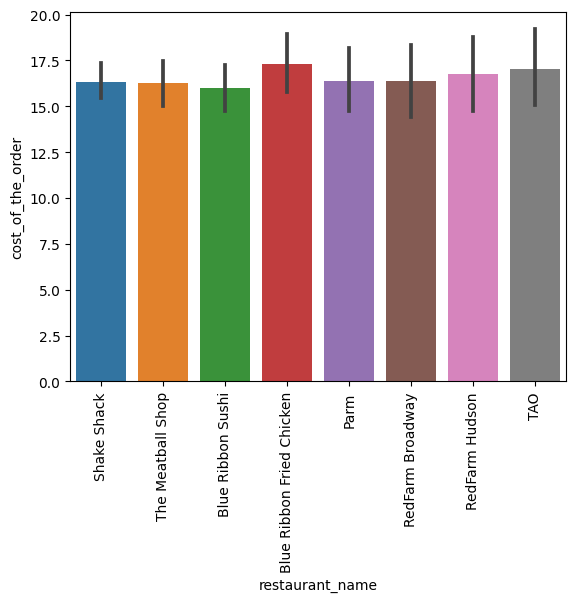

In [274]:
# plt.figure(figsize = (15,8))
sns.barplot(data = df, x = 'restaurant_name', y = 'cost_of_the_order',
            order = df.restaurant_name.value_counts().iloc[:8].index)
plt.xticks(rotation=90)
plt.show()

####Observations:
Blue Ribbon Fried Chicken restaurant has the highest cost of order

**Cuisine type vs Rating**

<Axes: xlabel='cuisine_type', ylabel='count'>

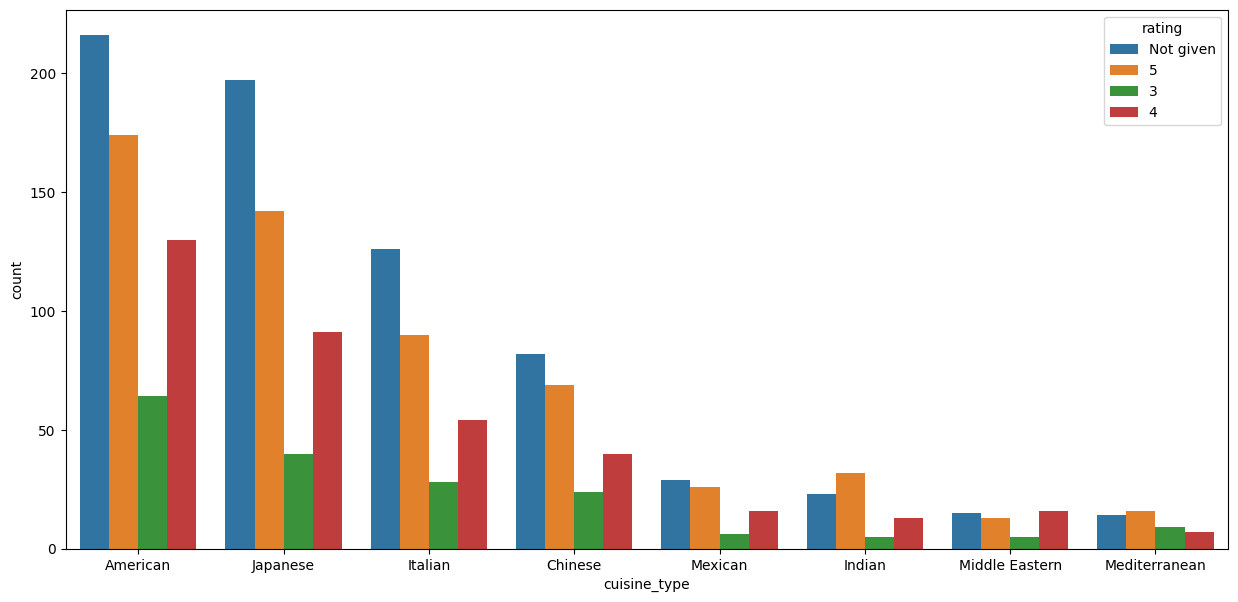

In [275]:
# Relationship between cuisine type and rating
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating', order = df.cuisine_type.value_counts().iloc[:8].index) #hue is used to group the data based on rating

#### Observation:
American, Japanese, Italian and Chinese are mostly rated cuisine

**Rating vs Delivery TIme**

<Figure size 2500x1000 with 0 Axes>

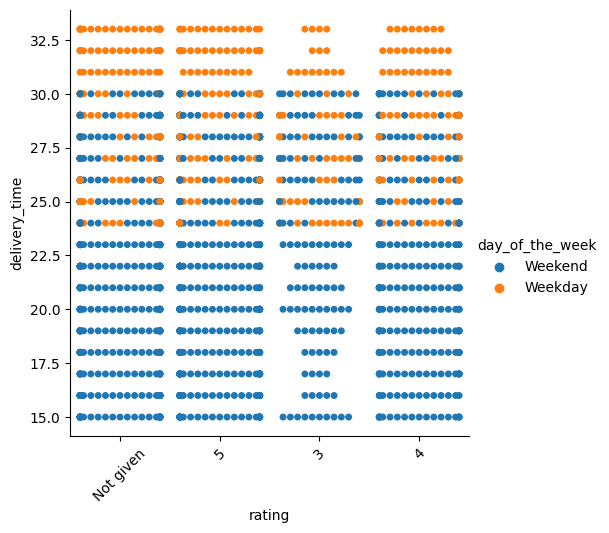

In [276]:
# Relationship between rating, delivery time and day of the week
plt.figure(figsize = (25,10))
#Swarm plot used for categorical data
sns.catplot(data=df, x='rating', y='delivery_time', hue="day_of_the_week", kind="swarm") # hue is used to group the data based on day of the week
plt.xticks(rotation=45)
plt.show()

#### Observation:
On Weekdays delivery time is Higher than Weekend delivery time. All of the rating given are almost similar every day, though rating 3 is slightly low compared with other ratings when the delivery time is very few and very high.

**cost of the order vs cuisine type**

<Figure size 2000x700 with 0 Axes>

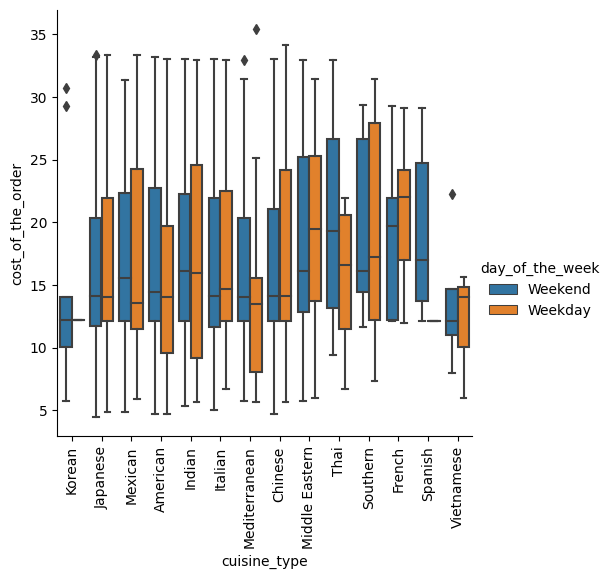

In [277]:
# Relationship between cost of order, cuisine type and day of the week
plt.figure(figsize = (20,7))
sns.catplot(data=df, x="cuisine_type", y="cost_of_the_order", hue="day_of_the_week",kind="box") # hue is used to group the data based on day of the week
plt.xticks(rotation=90)
plt.show()

####Observations:
* All of the cuisine order cost is similar on weekends but cost varies on weekdays.
* On Weekend Korean food cost is higher than on weekdays.
* Vietnamese cuisine cost is lower on weekdays

**Cuisine vs Food Preparation time**

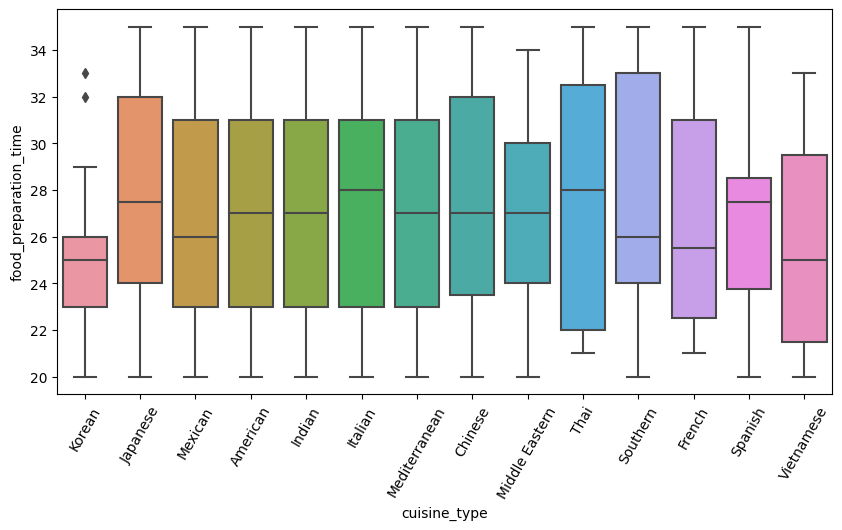

In [278]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="cuisine_type", y="food_preparation_time")
plt.xticks(rotation = 60)
plt.show()

####Observation:
* Korean cuisine preparation time is very specific within 23 to 26, though outliers found.
* Thai cuisine preparation time vary from low to high.

**Cost of the order vs Rating**

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

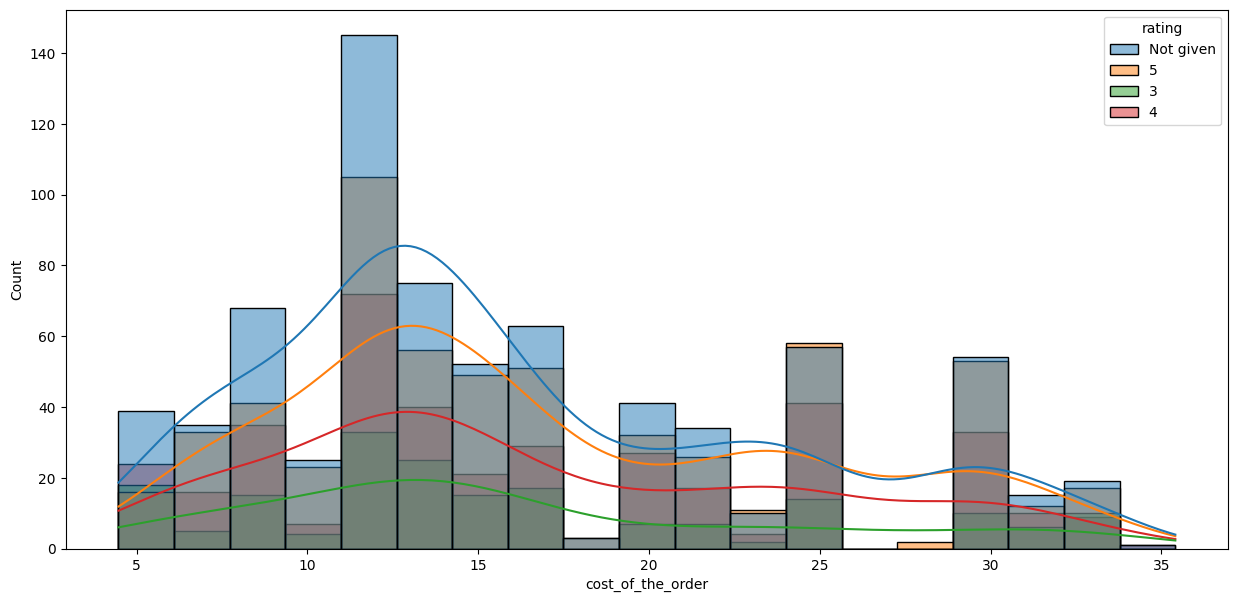

In [279]:
# Relationship between cost of the order and rating
plt.figure(figsize = (15,7)) #set the figure size
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'rating', kde = True) #To identify pattern kde(Kernel Density Estimation) assigned True and hue is used to group the data based on day of the week

#### Observation:
Again, most of the FoodHub population has not given any rating.  Most ratings provided by the costs at about 11 USD.

**Cuisine type vs Day of the week**

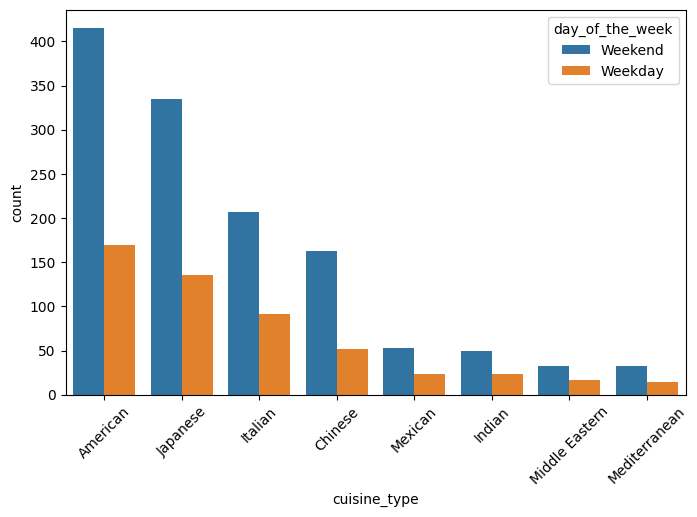

In [280]:
# plotting cuisine type and day of the week using countplot
plt.figure(figsize = (8,5)) #set the figure size
sns.countplot(data = df, x = 'cuisine_type',hue='day_of_the_week',order=df.cuisine_type.value_counts().iloc[:8].index) # hue is used to group the data based on day of the week
plt.xticks(rotation=45)
plt.show()

#### Observation:
American, Japanese, Italian and Chinese are most popular through out the week but demand is higher on weekend rather than weekdays.

**Pair plot among numeric data**

In [ ]:
# Relationship among numeric values
sns.pairplot(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])

#### Observations:
There is no signficant results. No linear relationship showing any of the numerical data.

**Correlation among variables**

In [ ]:
# Correlation using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:
* Very weak correlation between the features.
* Customer ID and Order ID negatively corelated with other features.


### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']  # get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Complete the code to find the mean rating

#### Observations:
Following four restaurants meet the requirement and qualify for the promotional offer.
1. The Meatball Shop
2. Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Define a function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Call the defined compute_rev function to get the revenue and calculate the total revenue using sum function
print('The net revenue is around', round(df['cost_of_the_order'].apply(compute_rev).sum(), 2), 'dollars')

#### Observations:
The net revenue on all orders is around 6166.3 dollars


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Create a column with the total time of food preparation and delivery
df['total_time']=df['food_preparation_time']+df['delivery_time']
# Count the orders those take more than 60 minutes to deliver
Order_60=df['total_time'][df['total_time']>60].count()
#Count the percentage of orders take more than 60 minutes to deliver
print("{0} percent of orders take more than 60 minutes to deliver".format(round(100*Order_60/df['total_time'].count(),2)))

#### Observations:
10.54 percent of orders take more than 60 minutes to get delivered from the time the order is placed


### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Calculate mean delivery time based on the day of the week
m_del_time=df.groupby('day_of_the_week')['delivery_time'].agg(['mean'])
m_del_time

#### Observations:
Weekday average food delivery time is 28.34 minutes, which is greater than weekend average food delivery time 22.47 minutes. May be there is huge traffic on weekdays rather than weekends.


### Conclusion and Recommendations

### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) 

### Conclusions:
1. Majority of customers (38.78%) didn't provide any rating.
2. Cuisine demand is significantly higher over the weekends.
 * Weekends orders are 1351 (71.18 %) of the day
 * Weekdays orders are 547 (28.82 %) of the whole week
3. Higher delivery time on weekdays, probably traffic is the main reason
4. Some restaurants and types of cuisine received a large amount of order requests through FoodHub, while others did not receive as many.
5. 784 customers placed only 1 order. 2nd order placed by only 267 customers, which is very low among overall 1200 customers.

### Recommendations:

1.  Average order delivery time is 24.16 minutes. It is recommend to lower the food delivery time. In that case customer intention to rate the orders will be increased.
2. It is suggested that, to raise customer demand minimize the cost of orders on weekdays. Discount vouchers can also be applied on weekdays.
3. Low demand restaurant need to improve the food quality and include variety of cuisine type.
4. To grow the demand of low rated cuisine it is proposed to reduce the delivery time and increase the number of stuffs on weekdays.
5. As many of the customers didn't place 2nd order,  Discount vouchers can also be given on multiple orders.

---